Rank based recommendation system -

In [83]:
import pandas as pd
import numpy as np

## Read Electronics ratings data
electronics_csv = pd.read_csv('/content/ratings_Electronics.csv',header='infer')


ParserError: Error tokenizing data. C error: Expected 4 fields in line 4273058, saw 5


In [ ]:
# Rename the columns
electronics_csv.columns = ['user_id', 'prod_id', 'rating', 'timestamp'] #Adding column names

electronics_csv = electronics_csv.drop('timestamp', axis=1) #Dropping timestamp
electronics_csv_copy = electronics_csv.copy(deep=True) #Copying the data to another dataframe

In [ ]:
electronics_csv.head()

#### EDA For the dataset


###### Shape of Data

In [ ]:
rows, columns = electronics_csv.shape
print("No of rows = ", rows)
print("No of columns = ", columns)

Data Types of Data

In [ ]:
electronics_csv.info()

Missing value analysis

In [84]:

# Find number of missing values in each column
electronics_csv.isna().sum()

,0
user_id,0
prod_id,0
rating,0


In [85]:

# Summary statistics of 'rating' variable
electronics_csv['rating'].describe()


,rating
count,309360.000000
mean,3.998991
std,1.382317
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


<Axes: xlabel='rating'>

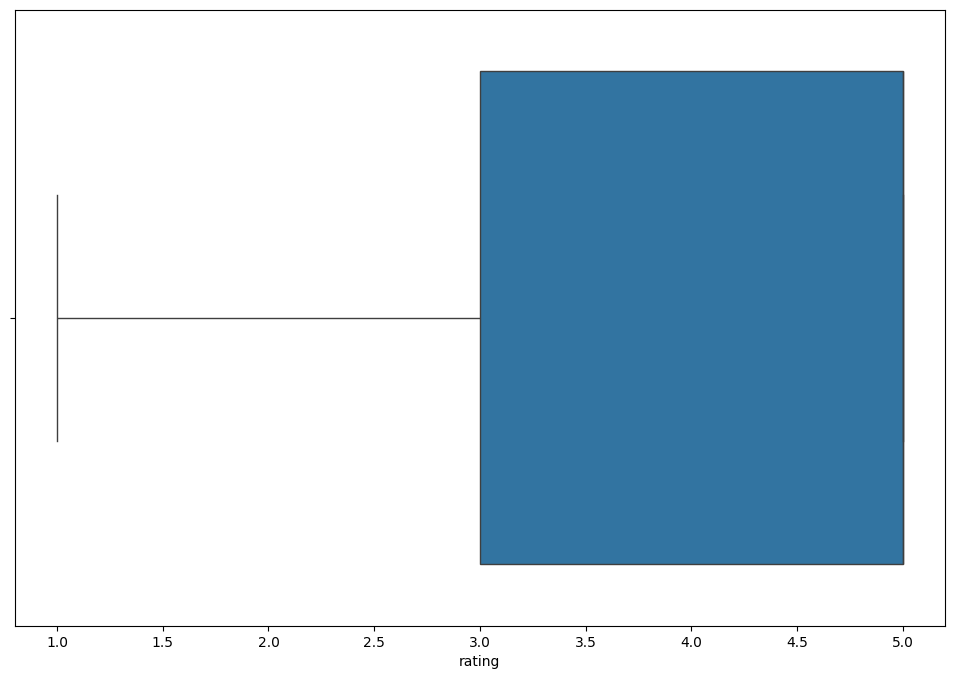

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

 # Create the box plot using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x=electronics_csv['rating'])



In [87]:
rating_gt_5 = electronics_csv[electronics_csv['rating'] > 5]
rating_gt_5.head()

,user_id,prod_id,rating


In [88]:
electronics_csv = electronics_csv[electronics_csv['rating'] <= 5]
electronics_csv.head()

,user_id,prod_id,rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


In [89]:
# Summary statistics of 'rating' variable
electronics_csv['rating'].describe()

,rating
count,309360.000000
mean,3.998991
std,1.382317
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


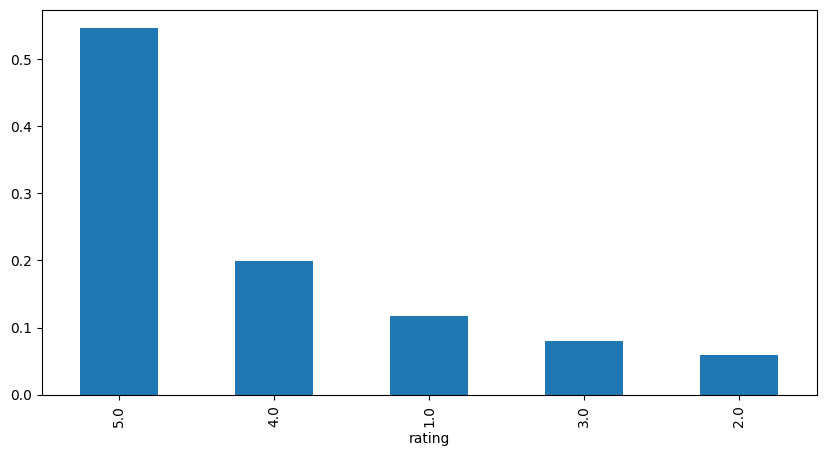

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns


#Create the plot and provide observations

plt.figure(figsize = (10,5))
electronics_csv['rating'].value_counts(1).plot(kind='bar')
plt.show()

The distribution is right skewed. Most of the ratings like 50% of ratings are 5 and it is decreasing towards left with 20% of them rating 2

In [91]:
# Number of unique user id and product id in the data
print('Number of unique users = ', electronics_csv['user_id'].nunique())
print('Number of unique products = ', electronics_csv['prod_id'].nunique())

Number of unique users =  259445
Number of unique products =  19584


Pre-Processing
Let's take a subset of the dataset (by only keeping the users who have given 50 or more ratings) to make the dataset less sparse and easy to work with.

In [92]:
electronics_csv['rating'].describe()

,rating
count,309360.000000
mean,3.998991
std,1.382317
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [105]:
counts = electronics_csv['user_id'].value_counts()
electronics_csv_final = electronics_csv[electronics_csv['user_id'].isin(counts[counts >= 5].index)]

In [106]:
print('The number of observations in the final data =', len(electronics_csv_final))
print('Number of unique users in the final data = ', electronics_csv_final['user_id'].nunique())
print('Number of unique products in the final data = ', electronics_csv_final['prod_id'].nunique())

The number of observations in the final data = 16590
Number of unique users in the final data =  2080
Number of unique products in the final data =  6551


In [107]:
# Top 10 users based on rating
most_rated = electronics_csv_final.groupby('user_id').size().sort_values(ascending=False)[:10]
most_rated


,0
user_id,
A231WM2Z2JL0U3,233
A5JLAU2ARJ0BO,179
A25HBO5V8S8SEA,119
A2AEZQ3DGBBLPR,68
A6FIAB28IS79,62
AKT8TGIT6VVZ5,59
A11D1KHM7DVOQK,58
AT2J7H5TRZM8Z,57
A1MJMYLRTZ76ZX,56


In [108]:
electronics_csv_final.head()

,user_id,prod_id,rating
117,AT09WGFUM934H,0594481813,3.0
177,A17HMM1M7T9PJ1,0970407998,4.0
188,A2IDCSC6NVONIZ,0972683275,5.0
388,A6J8D9V5S9MBE,0972683275,5.0
630,A3TAS1AG6FMBQW,0972683275,5.0


In [119]:
# #Creating the interaction matrix of products and users based on ratings and replacing NaN value with 0
# final_ratings_matrix = electronics_csv_final.pivot(index = 'user_id', columns ='prod_id', values = 'rating').fillna(0)
# print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

# #Finding the number of non-zero entries in the interaction matrix
# given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
# print('given_num_of_ratings = ', given_num_of_ratings)

# #Finding the possible number of ratings as per the number of users and products
# possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
# print('possible_num_of_ratings = ', possible_num_of_ratings)

# #Density of ratings
# density = (given_num_of_ratings/possible_num_of_ratings)
# density *= 100
# print ('density: {:4.2f}%'.format(density))

# final_ratings_matrix.head()


In [110]:
electronics_csv_final.shape

(16590, 3)

Rank Based Recommendation System

In [111]:
electronics_csv_final.head()

,user_id,prod_id,rating
117,AT09WGFUM934H,0594481813,3.0
177,A17HMM1M7T9PJ1,0970407998,4.0
188,A2IDCSC6NVONIZ,0972683275,5.0
388,A6J8D9V5S9MBE,0972683275,5.0
630,A3TAS1AG6FMBQW,0972683275,5.0


In [112]:
#Calculate the average rating for each product
average_rating = electronics_csv_final.groupby('prod_id')['rating'].mean()
average_rating

,rating
prod_id,
0594481813,3.000000
0970407998,4.000000
0972683275,5.000000
1400501466,3.666667
1400501520,5.000000
...,...
B0000A0ADQ,4.000000
B0000A0ADR,5.000000
B0000A0AEJ,4.000000


In [113]:

#Calculate the count of ratings for each product
count_rating = electronics_csv_final.groupby('prod_id')['rating'].count()
count_rating

,rating
prod_id,
0594481813,1
0970407998,1
0972683275,5
1400501466,3
1400501520,1
...,...
B0000A0ADQ,1
B0000A0ADR,1
B0000A0AEJ,1


In [114]:
#Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})

#Sort the dataframe by average of ratings
final_rating = final_rating.sort_values(by='avg_rating',ascending=False)

final_rating.head()

,avg_rating,rating_count
prod_id,,
B0000A0AEO,5.0,1
B00007L3NJ,5.0,1
B00005LLVP,5.0,1
B00007L9ZI,5.0,1
B00005LONG,5.0,1


In [115]:
#defining a function to get the top n products based on highest average rating and minimum interactions
def top_n_products(final_rating, n, min_interaction):

    #Finding products with minimum number of interactions
    recommendations = final_rating[final_rating['rating_count']>min_interaction]

    #Sorting values w.r.t average rating
    recommendations = recommendations.sort_values('avg_rating',ascending=False)

    return recommendations.index[:n]

In [116]:
# Recommending top 5 products with 50 minimum interactions  based on popularity

list(top_n_products(final_rating, 5, 50))

['B00007GQLU', 'B00005LEN4', 'B00009XVCZ', 'B00004SB92', 'B00007E7JU']

In [117]:
#Recommending top 5 products with 100 minimum interactions based on popularity

list(top_n_products(final_rating, 5, 100))

['B00004SB92', 'B00007E7JU', 'B00004ZCJE']